# Sistemas Inteligentes 2021/2022

## Mini-projeto 3: Aprendizagem Automática

## Relatório


## Grupo: 35

Número: 56947  - Nome: Lara Marques

Número: 56919  - Nome: Maria Elena Munteanu 

Número: 55164 - Nome: João Lago 

In [1]:
import sklearn
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

## 1. Processamento dos dados

Utilizando a biblioteca panda nos transformamos o ficheiro train.csv em um dataframe e após leitura do ficheiro de treino, guardámos os indices e nomes das colunas e separámos as variáveis em dependentes e independentes.

In [2]:
df_train= pd.read_csv("train.csv", sep=",")
df_train

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,0,2644,C,D-penicillamine,20296,F,N,N,N,N,0.5,369.510563,3.85,63.000000,663.000000,79.050000,124.702128,311.0,9.7,1.0
1,1,3492,C,Unknown,21915,F,Unknown,Unknown,Unknown,N,0.6,369.510563,4.38,97.648387,1982.655769,122.556346,124.702128,269.0,10.6,2.0
2,2,1702,C,D-penicillamine,18806,F,N,N,N,N,1.1,414.000000,3.44,80.000000,1003.000000,99.000000,55.000000,271.0,9.6,1.0
3,3,3523,C,Unknown,14610,F,Unknown,Unknown,Unknown,N,0.6,369.510563,4.04,97.648387,1982.655769,122.556346,124.702128,130.0,11.2,2.0
4,4,3428,D,Placebo,13727,F,N,Y,Y,Y,3.3,299.000000,3.55,131.000000,1029.000000,119.350000,50.000000,199.0,11.7,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,324,2255,C,D-penicillamine,22642,F,N,N,N,N,0.6,213.000000,4.07,12.000000,5300.000000,57.350000,68.000000,240.0,11.0,1.0
325,325,1899,C,Unknown,14975,M,Unknown,Unknown,Unknown,N,1.7,369.510563,3.66,97.648387,1982.655769,122.556346,124.702128,92.0,11.0,4.0
326,326,1152,D,D-penicillamine,25546,M,N,Y,N,N,2.3,586.000000,3.01,243.000000,2276.000000,114.700000,126.000000,339.0,10.9,3.0
327,327,71,D,D-penicillamine,18972,F,N,Y,Y,S,12.2,394.000000,3.08,111.000000,2132.000000,155.000000,243.000000,165.0,11.6,4.0


In [3]:
col_idxs=[x for x in range(2,19)]
col_names=np.array(df_train.columns)[col_idxs]
X = df_train.values[:,col_idxs]
y = df_train.values[:,19]
y=y.astype('int')

Para utilizar os classificadores do scikit-learn tivemos de binarizar certas colunas 

Binarizamos apenas os dados referentes às colunas Status, Drug, Sex, Ascites, Hepatomegaly, Spiders e Edema. Não é necessário nenhum processamento dos dados das restantes colunas, pois essas já contêm variáveis contínuas.

In [4]:
# primeiro construir um dataframe para a matriz X
df_train_X=df_train[col_names]
# criar um novo DataFrame
df_train_Xdum = pd.get_dummies(df_train_X, columns = ["Status", "Drug", "Sex", "Ascites", "Hepatomegaly", "Spiders", "Edema"])
# Extrair os novos nomes das colunas
col_names_dum=np.array(df_train_Xdum.columns)
Xdum=df_train_Xdum.values


## 2. Ajustamento dos modelos

### 2.1. Teste de modelos e validação

In [5]:
def graph_show(train,test,s,x=50):
    x = np.arange(2,x,1) 
    plt.plot(x, train, 'bo--', label='Train set')
    plt.plot(x, test, 'rd--', label='Test set')
    plt.ylim(20,101) 
    plt.xlabel(s)
    plt.ylabel('Accuracy (in %)') 
    plt.legend() 
    plt.show()

#### Árvores de Decisão

Validar o modelo com conjunto de treino e teste


Aqui nos pegamos o ficheiro xdum com os dados processados corretamente e o dividimos em dois tipos, um para ser usado como treinamento do modelo e outro será usado para a testagem do modelo.

In [6]:
print(Xdum)
X_train, X_test, y_train, y_test = train_test_split(Xdum,y,random_state=8)
print(X_train.shape)
print(X_test.shape)
acc = []

[[2.02960000e+04 5.00000000e-01 3.69510563e+02 ... 1.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.19150000e+04 6.00000000e-01 3.69510563e+02 ... 1.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.88060000e+04 1.10000000e+00 4.14000000e+02 ... 1.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [2.55460000e+04 2.30000000e+00 5.86000000e+02 ... 1.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.89720000e+04 1.22000000e+01 3.94000000e+02 ... 0.00000000e+00
  1.00000000e+00 0.00000000e+00]
 [2.42570000e+04 6.00000000e-01 2.80000000e+02 ... 0.00000000e+00
  1.00000000e+00 0.00000000e+00]]
(246, 30)
(83, 30)


A exatidão é 100% quando o parâmetro considerado está entre 2 e 3 ou seja a árvore não generaliza muito bem para o conjunto de teste, o que indica que o modelo em questão pode estar overfitted.

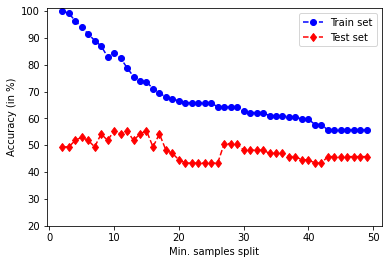

In [7]:
train = []
test = []
for i in range(2,50):
    ad = DecisionTreeClassifier(criterion='entropy', min_samples_split=i)
    ad = ad.fit(X_train,y_train)
    train.append(ad.score(X_train,y_train)*100)
    test.append(ad.score(X_test,y_test)*100)

graph_show(train,test,'Min. samples split')

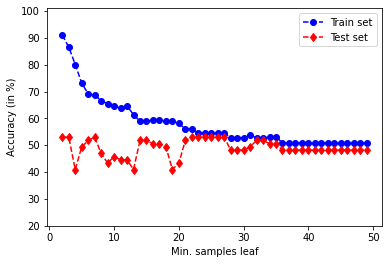

In [8]:
train = []
test = []
for i in range(2,50):
    ad = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=i)
    ad = ad.fit(X_train,y_train)
    train.append(ad.score(X_train,y_train)*100)
    test.append(ad.score(X_test,y_test)*100)

graph_show(train,test,'Min. samples leaf')

In [9]:
# Arvore de decisão 1:
dt1 = DecisionTreeClassifier(criterion='entropy')
dt1.fit(X_train, y_train)
scores = cross_val_score(dt1,X=Xdum,y=y,cv=10)
#print('CV accuracy:', *scores, sep='\n\t')
print('Average CV accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))
acc.append('%.3f +/- %.3f  %.3f dt1'%(np.mean(scores), np.std(scores),dt1.score(Xdum,y)))

Average CV accuracy: 0.416 +/- 0.061


In [10]:
# Arvore de decisão 2: min_samples_leaf = 3, min_samples_split = 4
dt2 = DecisionTreeClassifier(criterion='entropy',min_samples_leaf = 3,min_samples_split = 4)
dt2.fit(X_train, y_train)
scores = cross_val_score(dt2,X=Xdum,y=y,cv=10)
#print('CV accuracy:', *scores, sep='\n\t')
print('Average CV accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))
acc.append('%.3f +/- %.3f  %.3f dt2'%(np.mean(scores), np.std(scores),dt2.score(Xdum,y)))

Average CV accuracy: 0.435 +/- 0.064


In [11]:
# Arvore de decisão 3: max_depth = 6, min_samples_leaf = 8
dt3 = DecisionTreeClassifier(criterion='entropy',max_depth = 6,min_samples_leaf = 8)
dt3.fit(X_train, y_train)
scores = cross_val_score(dt3,X=Xdum,y=y,cv=10)
#print('CV accuracy:', *scores, sep='\n\t')
print('Average CV accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))
acc.append('%.3f +/- %.3f  %.3f dt3'%(np.mean(scores), np.std(scores),dt3.score(Xdum,y)))

Average CV accuracy: 0.425 +/- 0.107


### K-NN

Procura no espaço de amostras pelos k vizinhos mais próximos do ponto desconhecido.

In [12]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
scores = cross_val_score(knn,X=Xdum,y=y,cv=2)
#print('CV accuracy:', *scores, sep='\n\t')
print('Average CV accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))
acc.append('%.3f +/- %.3f  %.3f knn'%(np.mean(scores), np.std(scores),knn.score(Xdum,y)))

Average CV accuracy: 0.316 +/- 0.031


No exemplo acima utilizamos dados que não estavam normalizados e assim tivemos uma acuracia media mais baixa. No exemplo abaixo os dados foram normalizados e assim tivemos uma acuracia media mais alta, a normalização consiste em igualar o intervalo de amplitude dos valores dos atributos.Assim diminuimos a probabilidade de dados com amplitudes de valores muito diferentes serem ignorados ou priorizados. 

In [13]:
scaler = StandardScaler()
scaler.fit(Xdum)
standardized_data = scaler.transform(Xdum)
knn_breast = KNeighborsClassifier(n_neighbors=3)
knn_breast.fit(standardized_data,y)

scores = cross_val_score(knn_breast,X=standardized_data,y=y,cv=10)
#print('CV accuracy:', *scores, sep='\n\t')
print('Average CV accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))
acc.append('%.3f +/- %.3f  %.3f knn_breast'%(np.mean(scores), np.std(scores),knn.score(Xdum,y)))


Average CV accuracy: 0.398 +/- 0.098


### Naive Bayes

Preve as probabilidades de um determinado ponto pertencer a uma classe, esse modelo assume que todos os atributos são independentes uns dos outros. 


In [14]:
nb = GaussianNB()
nb.fit(Xdum, y)
scores = cross_val_score(nb,X=Xdum,y=y,cv=5)
#print('CV accuracy:', *scores, sep='\n\t')
print('Average CV accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))
acc.append('%.3f +/- %.3f  %.3f nb'%(np.mean(scores), np.std(scores),nb.score(Xdum,y)))

Average CV accuracy: 0.325 +/- 0.043


### 2.2. Seleção e apresentação do melhor modelo


In [20]:
for x in acc:
    print(x)

0.416 +/- 0.061  0.869 dt1
0.435 +/- 0.064  0.772 dt2
0.425 +/- 0.107  0.608 dt3
0.316 +/- 0.031  0.492 knn
0.398 +/- 0.098  0.492 knn_breast
0.325 +/- 0.043  0.374 nb


|Modelo | Exatidao | Score
| --- | --- | --- |
| Decision Tree 3| 0.425 +/- 0.107 | 0.608 |
| Decision Tree 2| 0.435 +/- 0.064 | 0.772 |
| Decision Tree 1 | 0.416 +/- 0.061 | 0.869 |
| K-NN | 0.316 +/- 0.031 | 0.492 |
| K-NN Standard| 0.398 +/- 0.098 | 0.492 |
| Naive Bayes| 0.325 +/- 0.043 | 0.374 |

Segundo a exatidão dos dados o melhor modelo é árvore de decisão com os parametros max_depth = 6, min_samples_leaf = 8


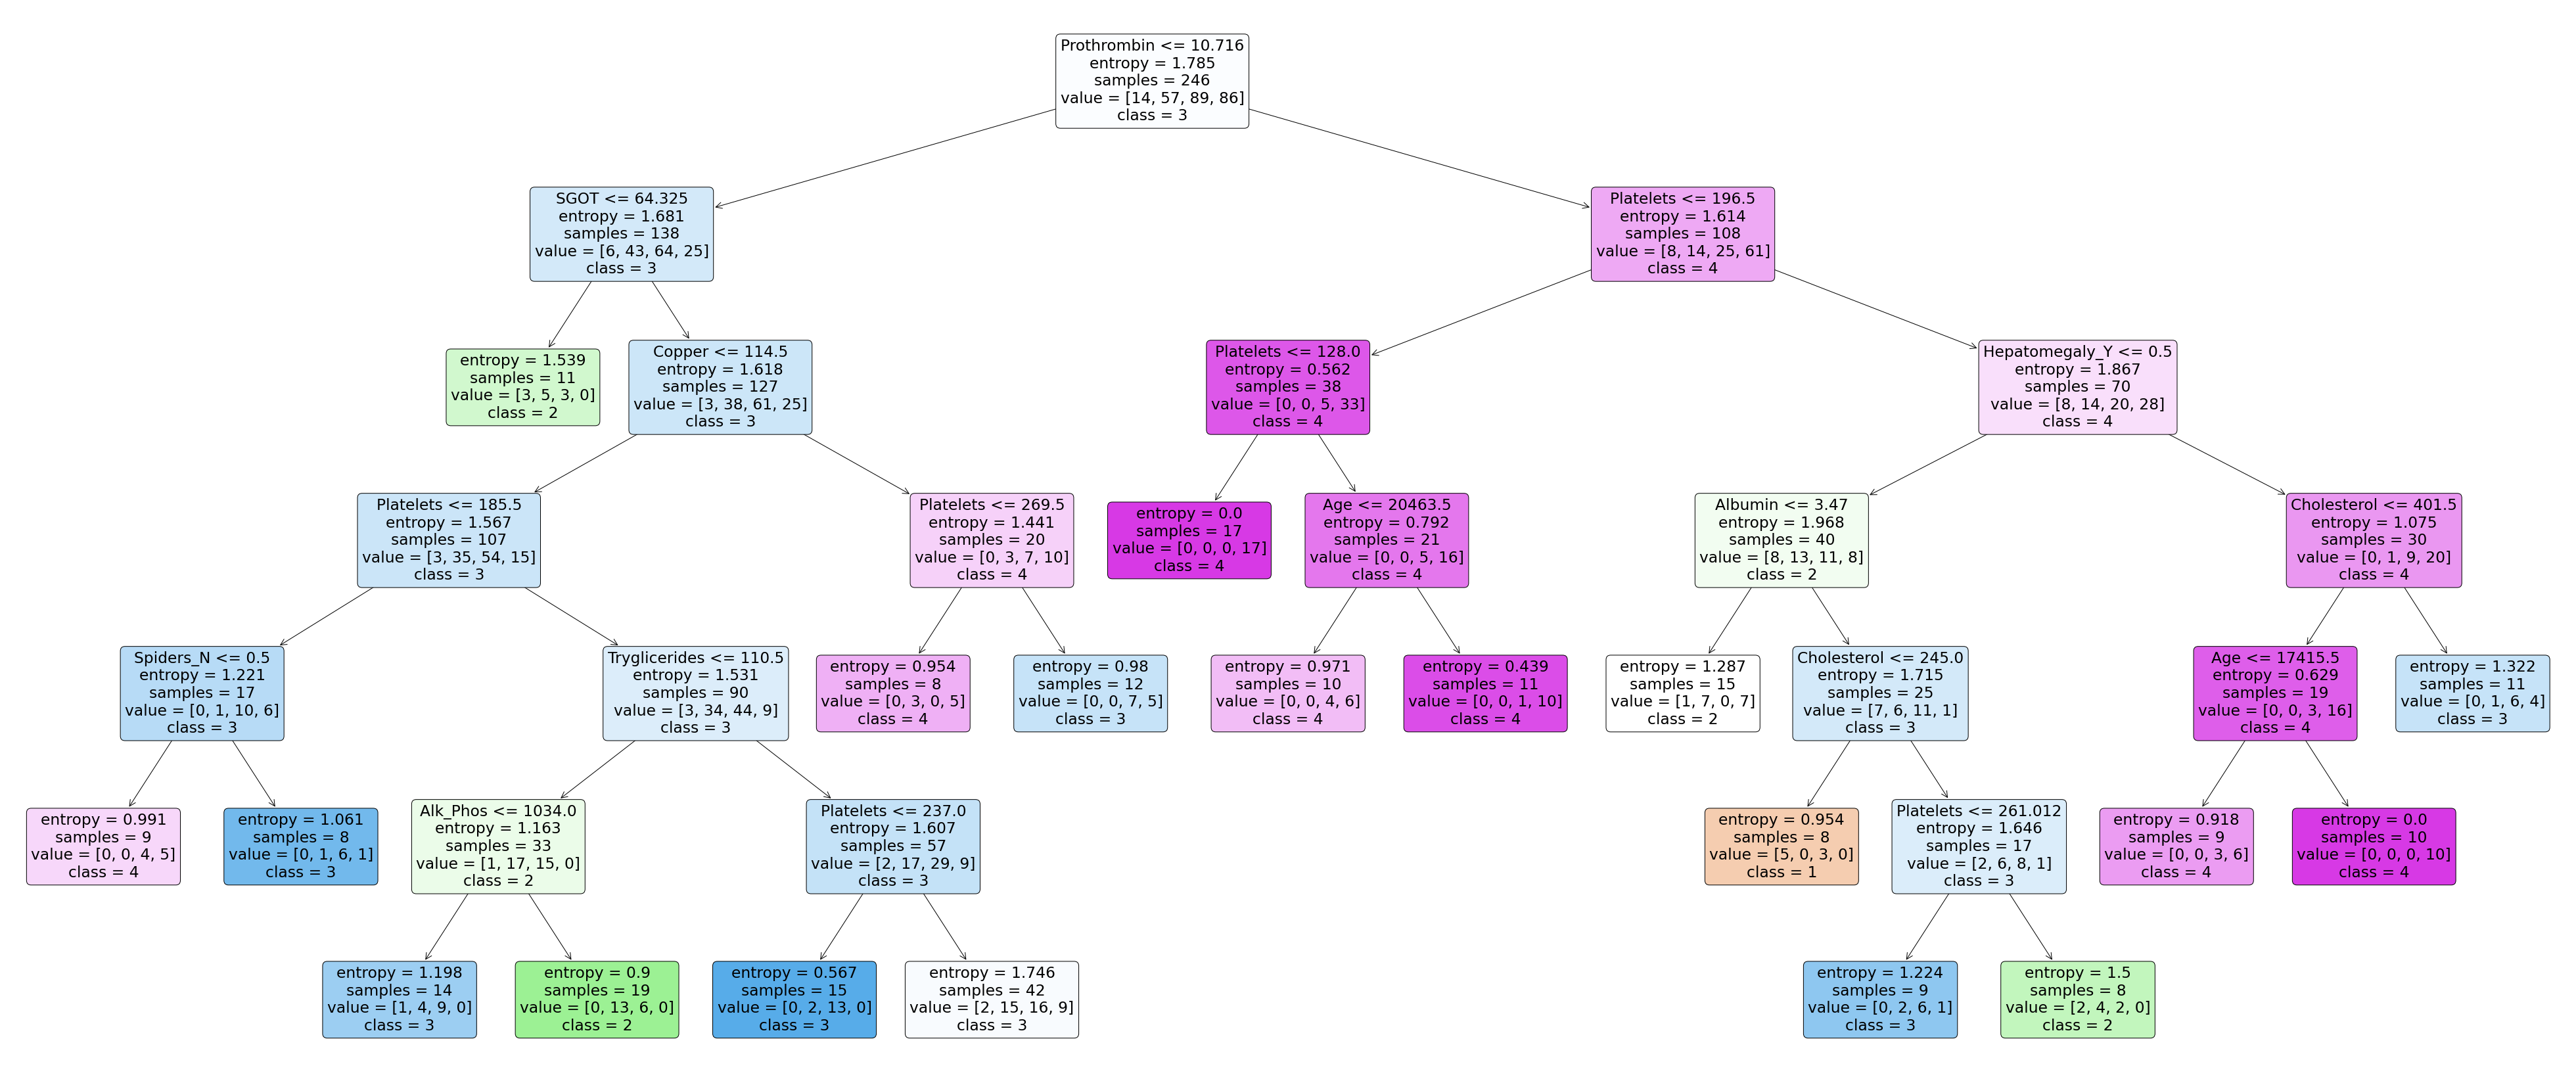

In [16]:
plt.figure(figsize=[70,30])
plot_tree(dt3, 
          feature_names=col_names_dum,
          class_names=["1","2","3","4"],
          filled=True, rounded=True)
plt.show()

## 3. Validação do modelo final ajustado com um conjunto de validação independente

In [17]:
df_test= pd.read_csv("test.csv", sep=",")
col_idxs=[x for x in range(2,19)]
col_names=np.array(df_test.columns)[col_idxs]
X = df_test.values[:,col_idxs]
df_test_X=df_test[col_names]
df_test_Xdum = pd.get_dummies(df_test_X, columns = ["Status", "Drug", "Sex", "Ascites", "Hepatomegaly", "Spiders", "Edema"])
col_names_dum=np.array(df_test_Xdum.columns)
X_new=df_test_Xdum.values
p = dt3.predict(X_new)

with open("dados.txt",'w',encoding = 'utf-8') as f:
    f.write("ID,Stage\n")
    for i in range(df_test.shape[0]):
        f.write(f"{df_test['ID'].values[i]},{p[i]}\n")


Apesar de nos dados de treino, o resultado ser o melhor com o modelo escolhido, com os dados de teste o resultado não foi muito alto.

## 4. Competição 

Como o modelo que escolhemos não teve os melhores resultados, testámos os modelos concluindo que o melhor seria o modelo K-NN com os dados normalizados.

Para a aprendizagem dos modelos utilizamos todas menos a coluna do id e do Número de dias de cada pessoa.

In [18]:
df_test= pd.read_csv("test.csv", sep=",")
col_idxs=[x for x in range(2,19)]
col_names=np.array(df_test.columns)[col_idxs]
X = df_test.values[:,col_idxs]
df_test_X=df_test[col_names]
df_test_Xdum = pd.get_dummies(df_test_X, columns = ["Status", "Drug", "Sex", "Ascites", "Hepatomegaly", "Spiders", "Edema"])
col_names_dum=np.array(df_test_Xdum.columns)
X_new=df_test_Xdum.values
#---------------------
scaler_t = StandardScaler()
scaler_t.fit(X_new)
standardized_teste = scaler_t.transform(X_new)
p = knn_breast.predict(standardized_teste)

with open("dados_n.txt",'w',encoding = 'utf-8') as f:
    f.write("ID,Stage\n")
    for i in range(df_test.shape[0]):
        f.write(f"{df_test['ID'].values[i]},{p[i]}\n")


In [19]:
print(classification_report(y_test, p))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           2       0.23      0.31      0.26        16
           3       0.38      0.37      0.38        35
           4       0.38      0.31      0.34        29

    accuracy                           0.33        83
   macro avg       0.25      0.25      0.24        83
weighted avg       0.34      0.33      0.33        83

